#### [ PYTORCH MODEL ]

- 주제 : 펭귄 품종 분류 모델
- 데이터 :  penguins.csv
- 구성 : 품종 + 특징들 
- 학습 : 지도학습 => 분류 / 다중분류

[1] 모듈 로딩 및 데이터 준비<hr>

In [278]:
## 모듈 로딩
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt  

from sklearn.preprocessing import MinMaxScaler

In [279]:
##  데이터 준비 
DATA_FILE = '../Data/penguins.csv'

[2] 데이터 로딩 및 확인<hr>

In [280]:
##  데이터 로딩 
dataDF = pd.read_csv(DATA_FILE)
dataDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [281]:
## 실제 데이터와 타입 체크
dataDF.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE


In [282]:
## 1차 확인 사항 
# - 결측치 컬럼이 7개 중 5개 존재 

[3] 탐색적 데이터 분석<hr>

[3-1] 결측치 전처리 

In [283]:
## 결측치 컬럼 5개  => 소량으로 drop 처리
dataDF.dropna(inplace=True)
dataDF.reset_index(drop=True, inplace=True)

In [284]:
dataDF.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

[3-2] 피쳐 전처리 

In [285]:
## species 컬럼, island 컬럼, sex 컬럼
pd.set_option('future.no_silent_downcasting', True)

cateDF = dataDF[['species', 'island', 'sex']].copy()


for col in ['species', 'island', 'sex']:
    result = cateDF[col].unique()

    cateDF[col]= cateDF[col].replace( { result[idx]:idx for idx in range(len(result)) } )
    cateDF[col]= cateDF[col].astype('int')

print(cateDF.head(1), cateDF.dtypes, cateDF.shape, cateDF.index, sep='\n\n')


   species  island  sex
0        0       0    0

species    int64
island     int64
sex        int64
dtype: object

(333, 3)

RangeIndex(start=0, stop=333, step=1)


In [286]:
## 연속형 피쳐 스케일링 : bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g 컬럼
mmScaler = MinMaxScaler()
scaled_features=mmScaler.fit_transform(dataDF[dataDF.columns[2:-1]])

scaledDF = pd.DataFrame(scaled_features, columns=dataDF.columns[2:-1])
print(scaledDF.head(1), scaledDF.dtypes, scaledDF.shape, sep='\n\n')

   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0        0.254545       0.666667           0.152542     0.291667

bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
dtype: object

(333, 4)


In [287]:
## 정규화된 컬럼들 연결 
penguinDF = pd.concat((cateDF, scaledDF), axis='columns')
penguinDF

,species,island,sex,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,0,0,0,0.254545,0.666667,0.152542,0.291667
1,0,0,1,0.269091,0.511905,0.237288,0.305556
2,0,0,1,0.298182,0.583333,0.389831,0.152778
3,0,0,1,0.167273,0.738095,0.355932,0.208333
4,0,0,0,0.261818,0.892857,0.305085,0.263889
...,...,...,...,...,...,...,...
328,2,1,1,0.549091,0.071429,0.711864,0.618056
329,2,1,1,0.534545,0.142857,0.728814,0.597222
330,2,1,0,0.665455,0.309524,0.847458,0.847222
331,2,1,1,0.476364,0.202381,0.677966,0.694444


[3-3] 타겟 기준 상관관계 

In [288]:
## 수치 확인 corr() => bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g
penguinDF.corr()['species']

species              1.000000
island              -0.009176
sex                 -0.010964
bill_length_mm       0.730548
bill_depth_mm       -0.740346
flipper_length_mm    0.850737
body_mass_g          0.750434
Name: species, dtype: float64

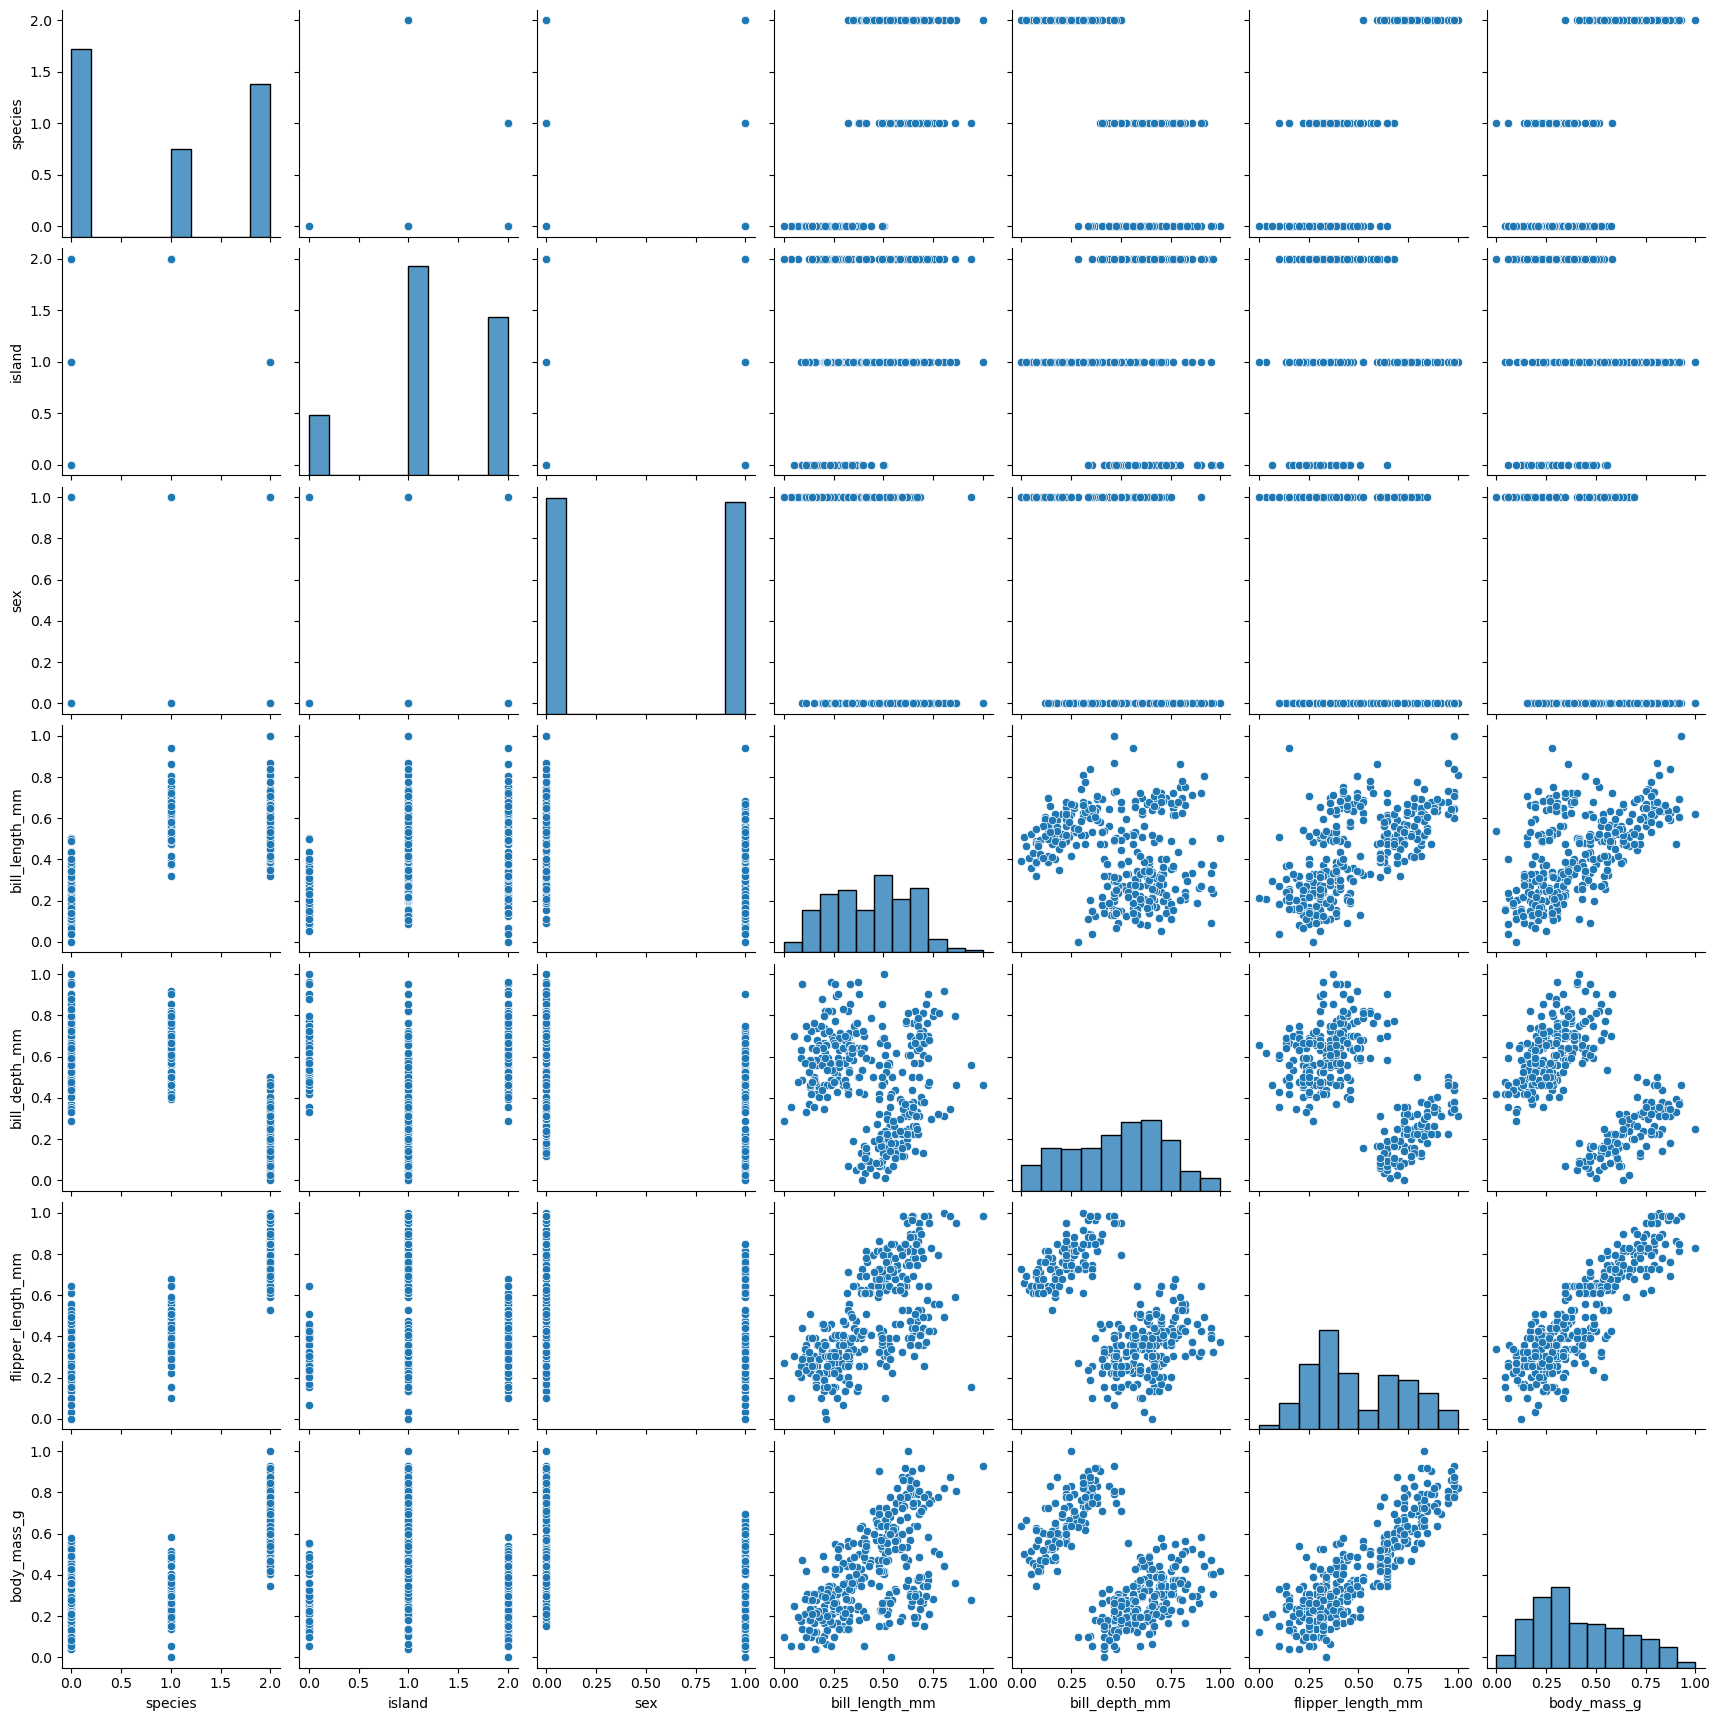

In [289]:
## 시각 확인 => => bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g
sns.pairplot(penguinDF)
plt.show()

<Axes: >

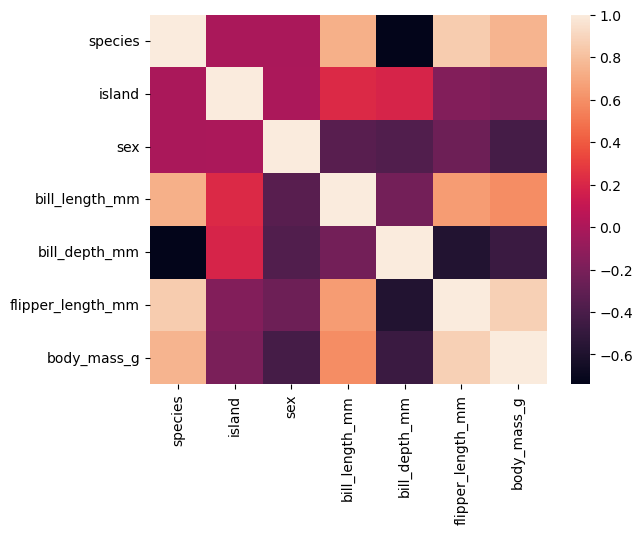

In [290]:
sns.heatmap(penguinDF.corr())

[3-4] 피쳐들끼리 관계성 

In [291]:
# 수치형 피쳐들 스케일링 
featureDF=penguinDF[penguinDF.columns[3:]]
featureDF.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,0.432465,0.483912,0.490966,0.418627
std,0.198861,0.234433,0.237555,0.223671
min,0.000000,0.000000,0.000000,0.000000
25%,0.269091,0.297619,0.305085,0.236111
50%,0.450909,0.500000,0.423729,0.375000
75%,0.600000,0.666667,0.694915,0.576389
max,1.000000,1.000000,1.000000,1.000000


<Axes: >

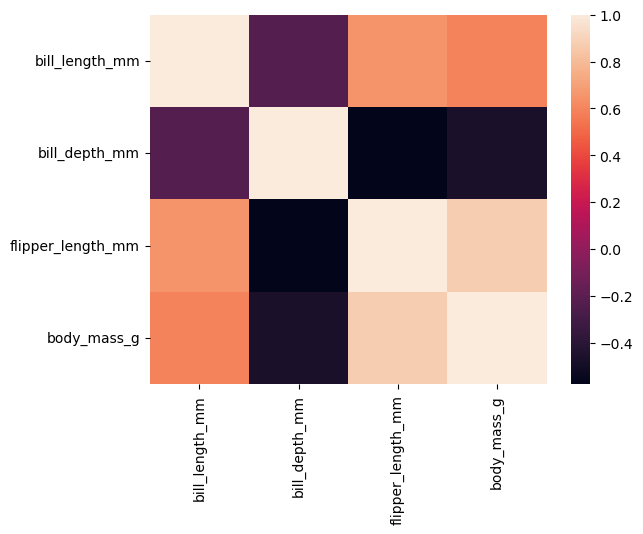

In [292]:
sns.heatmap(featureDF.corr())

In [293]:
## 피쳐 선택 : bill_length_mm,	bill_depth_mm, body_mass_g 
## 타겟 품종 : speices 

#### 신경망모델 구현 <hr>
- 피쳐와 타겟 분리
- 피쳐와 타겟 가공
- 학습용 & 테스트 분리
- 학습용 기준으로 표준화 & 정규화 진행  
- 데이터셋 클래스 설계 및 구현
- 모델 클래스 설계 및 구현 
- 학습 진행 
- 학습 결과 분석 
- 튜닝 여부 결정
- 모델 저장 & 서비스 연동 

[1] 모듈 로딩 및 데이터 준비<hr>

In [294]:
#%pip install torchinfo   # 모델 정보 및 구조 관련 모듈

In [295]:
## 모듈 로딩
import torch 
import torch.nn as nn 
import torch.nn.functional as F 
from torch.utils.data import Dataset, DataLoader                ## 데이터셋 관련 
import torch.optim as optim                                     ## 최적화 모듈
from torchmetrics.classification import *                       ## 모델 성능지표 관련
from torchinfo import summary                                   ## 모델 구조 및 정보 관련 

from sklearn.model_selection import train_test_split            ## 학습용 & 테스트용 데이터셋 분리
from sklearn.preprocessing import MinMaxScaler, StandardScaler  ## 연속형 피쳐 스케일링
from sklearn.preprocessing import OneHotEncoder, LabelEncoder   ## 범주형 피쳐, 타겟 인코딩


In [296]:
## 데이터 준비
DATA_FILE = '../Data/penguins.csv'

[2] 데이터 피쳐와 타겟 분리 <hr>

In [297]:
## 데이터 로딩 및 결측치 처리
dataDF = pd.read_csv(DATA_FILE)
dataDF.dropna(inplace=True)

In [298]:
## 피쳐와 타겟 분리 
## - 피쳐 : 'bill_length_mm', 'bill_depth_mm', 'body_mass_g'
## - 타겟 : 'species'
featureDF = dataDF[['bill_length_mm', 'bill_depth_mm', 'body_mass_g']]
targetSR  = dataDF[dataDF.columns[0]]

In [299]:
print(f'featureDF : {featureDF.shape}   targetSR : {targetSR.shape}')

featureDF : (333, 3)   targetSR : (333,)


[3] 학습용 & 테스트용 분리<hr>

In [300]:
# train : test = 75 : 25
X_train, X_test, y_train, y_test = train_test_split(featureDF, 
                                                    targetSR,
                                                    stratify=targetSR,
                                                    random_state=42)

In [301]:
print(f'[TRAIN] X_train : {X_train.shape}   y_train : {y_train.shape}')
print(f'[TEST]  X_test  : {X_test.shape}    y_test : {y_test.shape}')

[TRAIN] X_train : (249, 3)   y_train : (249,)
[TEST]  X_test  : (84, 3)    y_test : (84,)


[4] 학습용 기준으로 정규화 진행<hr>

In [302]:
## 연속형 피쳐 스케일링
mmScaler = MinMaxScaler()
mmScaler.fit(X_train)

scaled_X_Train = mmScaler.transform(X_train)
scaled_X_Test = mmScaler.transform(X_test)

In [303]:
## 타겟 인코딩
lbEncoder = LabelEncoder()
lbEncoder.fit(y_train)
y_train=lbEncoder.transform(y_train)
y_test=lbEncoder.transform(y_test)

[5] 데이터셋 클래스 정의 및 구현<hr>

In [304]:
## ----------------------------------------------------------------
## 펭귄데이터에 대한 전용 Dataset 클래스 정의
## 클래스이름 : PenguinNPDS
## 부모클래스 : Dataset
## 데이터구성 : 피쳐 3 NP + 타겟 1 NP
## ----------------------------------------------------------------
class PenguinNPDS(Dataset):
    ## 데이터의 피쳐, 타겟 외 기타 정보 초기화 메서드 
    def __init__(self, featureNP, targetNP):
        super().__init__()
        self.feature   = featureNP
        self.target    = targetNP 
        self.n_feature = featureNP.shape[1]
        self.n_samples = featureNP.shape[0]

    ## 데이터의 갯수 반환 메서드
    def __len__(self):
        return self.n_samples
    
    ## 특정 인덱스의 피쳐와 타겟 텐서 반환 메서드
    def __getitem__(self, index):
        fTS = torch.FloatTensor(self.feature[index])
        tTS = torch.tensor(self.target[index])
        return fTS, tTS
    

In [305]:
## DS 확인
print(f'scaled_X_Train : {type(scaled_X_Train)},  y_train : {type(y_train)}')
print(f'scaled_X_Train===\n{scaled_X_Train[:2]}\ny_train : {y_train[:2]}')

## 데이터셋 인스턴스 생성
testDS = PenguinNPDS(scaled_X_Train, y_train)

scaled_X_Train : <class 'numpy.ndarray'>,  y_train : <class 'numpy.ndarray'>
scaled_X_Train===
[[0.67049808 0.7037037  0.35294118]
 [0.24137931 0.74074074 0.51470588]]
y_train : [1 0]


In [306]:
## 데이터셋 인스턴스 확인
testDS[0]

(tensor([0.6705, 0.7037, 0.3529]), tensor(1))

[6] 모델 클래스 정의 및 구현<hr>

In [307]:
# 모델 클래스 설계 ----------------------------------------------------------------------
## 회귀용 커스텀 모델 
## 클래스이름 : PenguinModel
## 부모클래스 : nn.Module
## 모델층구성   입력신호/피쳐수       출력신호수/퍼셉트론수       활성화함수
## - 입력층   :      3                      50                  ReLu
## - 은닉층1  :      50                     100                 ReLu 
## - 은닉층2  :     100                     150                 ReLu 
## - 은닉층3  :     150                     50                  ReLu 
## - 은닉층4  :      50                     25                  ReLu 
## - 은닉층5  :      25                     15                  ReLu 
## - 출력층   :      15                     3                  Softmax => 손실함수 내 포함
## - -----------------------------------------------------------------------------------


In [308]:
class PenguinModel(nn.Module):

	def __init__(self):
		super().__init__()
		self.in_layer = nn.Linear(3,50)
		self.hd_layer1 = nn.Linear(50,100)
		self.hd_layer2 = nn.Linear(100,150)
		self.hd_layer3 = nn.Linear(150,50)
		self.hd_layer4 = nn.Linear(50,25)
		self.hd_layer5 = nn.Linear(25,15)
		self.out_layer = nn.Linear(15,3)

	def forward(self,out):
		out = F.relu(self.in_layer(out))
		out = F.relu(self.hd_layer1(out))
		out = F.relu(self.hd_layer2(out))
		out = F.relu(self.hd_layer3(out))
		out = F.relu(self.hd_layer4(out))
		out = F.relu(self.hd_layer5(out))
		out = self.out_layer(out)
	
		return out



In [309]:
# 모델생생

Pengui_Model = PenguinModel() 

In [310]:
# 모델구조확인
Pengui_Model

# 모델 인스터스, 입력 데이터 형태
summary(Pengui_Model, input_size=(100,3))

Layer (type:depth-idx)                   Output Shape              Param #
PenguinModel                             [100, 3]                  --
├─Linear: 1-1                            [100, 50]                 200
├─Linear: 1-2                            [100, 100]                5,100
├─Linear: 1-3                            [100, 150]                15,150
├─Linear: 1-4                            [100, 50]                 7,550
├─Linear: 1-5                            [100, 25]                 1,275
├─Linear: 1-6                            [100, 15]                 390
├─Linear: 1-7                            [100, 3]                  48
Total params: 29,713
Trainable params: 29,713
Non-trainable params: 0
Total mult-adds (M): 2.97
Input size (MB): 0.00
Forward/backward pass size (MB): 0.31
Params size (MB): 0.12
Estimated Total Size (MB): 0.43

In [311]:
# 모델 & 데이터셋 동작 테스트

ds = PenguinNPDS(scaled_X_Train,y_train)

feature , target = ds[0]



Pengui_Model(feature) , Pengui_Model(feature).argmax(), target



(tensor([0.1811, 0.0992, 0.0277], grad_fn=<ViewBackward0>),
 tensor(0),
 tensor(1))

In [312]:
# 학습 준비
# 학습 관련 설정값

EPOCHS = 10 		# 처음 부터 끝까지
BATCH_SIZE = 30		# 한번학습하는 양, 즉 W 와 b 업데이트

T_ITERATION = int(len(scaled_X_Train) / BATCH_SIZE)

# 옵티마이저 학습률  설정
lr = 0.005 

DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

print(f'T_ITERATION {T_ITERATION}, BATCH_SIZE {BATCH_SIZE}, DEVICE{DEVICE}')



T_ITERATION 8, BATCH_SIZE 30, DEVICEcpu


In [313]:
# 학습 관련 인스턴스 생성
TRAINDS = PenguinNPDS(scaled_X_Train,y_train)
TRAINDL = DataLoader(TRAINDS, batch_size=BATCH_SIZE, shuffle=True)

MODEL = PenguinModel()
OPTIMIZER = optim.Adam(MODEL.parameters(),lr=lr)

LOSS_FN = nn.CrossEntropyLoss()

In [314]:
# 학슴 관련 함수들
# -검증 함수 : 테스트 또는 검증용 데이터셋 사용하는 함수
# 			W,b 업데이트 안함




##- 검증 함수 --------------------------------------------
##- 검증용 데이터셋으로 모델 검증
##- 학습 지속여부 결정 기준이 됨
##- -----------------------------------------------------
def evaluate():
    # 에포크 단위로 검증 => 검증 모드
    MODEL.eval()
    
    # W, b가 업데이트 해제
    with torch.no_grad():
       
        # 검증용 데이터셋 => 텐서화 ndarray ==> tensor변환
        x = torch.FloatTensor(scaled_X_Test) 
        y = torch.LongTensor(y_test)
        
        # 검증진행
        pre_y= MODEL(x)
        
        # 손실 계산
        loss = LOSS_FN(pre_y, y.reshape(-1).long())
        #정확도 계산
        accuracy = MulticlassAccuracy(num_classes=3)
        acc = accuracy(pre_y,y.reshape(-1))
    return loss.item(), acc.item()
    # 방법2)
    #return loss.item()
    # 방법1)
    #return T_LOSS/CNT, T_ACC/CNT

In [315]:
# 학습관련함수들
# - 학습 함수 : 학습용 데이터셋 사용하는 함수
# 			W,b 업데이트 진행



##- 학습 함수 --------------------------------------------
##- 학습용 데이터셋으로 모델 검증
##- -----------------------------------------------------
def training():
    # 학습 모드 설정
    MODEL.train()

    E_LOSS, E_ACC = 0,0
    #for i in range(ITERATION): 
    for feature, target in TRAINDL:
        # 배치크기 만큼 feature, target 로딩
        #print('로딩 데이터 :',feature.shape, target.shape)                                                                 
        # 가중치 기울기 0 초기화
        OPTIMIZER.zero_grad()

        # 학습 진행
        pre_y = MODEL(feature)

        # 손실 계산
        loss = LOSS_FN(pre_y, target.reshape(-1).long())
        
        # 정확도 계산
        accuarcy = MulticlassAccuracy(num_classes=3)
        acc = accuarcy(pre_y,target.reshape(-1))

        # 역전파 진행
        loss.backward()

        # 가중치/절편 업데이트
        OPTIMIZER.step()

        E_LOSS += loss.item()
        E_ACC += acc.item()
    return E_LOSS/T_ITERATION, E_ACC/T_ITERATION

